# Séance 1 : Introduction et rappels théoriques

## Table des matières

* [Introduction](#Intro)
* [Fonction de répartition](#CDF)
* [Densité de probabilité](#PDF)
* [Loi normale](#GAUSS)
* [Utilisation de la table de la loi normale](#CDF-GAUSS)
* [Fractiles](#FRACT)
* [Exercices](#EXOS)
* [Annexe 1: Utilisation de Python](#PYTHON)
* [Annexe 2: Utilisation de R](./Utilisation%20de%20R.ipynb)

## <a id="Intro"> Introduction </a>

Dans cette séance, nous allons apprendre à utiliser la loi normale pour modéliser quelques problèmes pratiques.
Pour cela, nous allons tout d'abord revenir sur quelques points théoriques comme la fonction de répartition ou la densité de probabilité pour les variables aléatoires continues. Ensuite, nous reviendrons sur les propriétés de la loi normale avant de nous attarder sur les aspects pratiques de son utilisation.
Finalement, nous verrons quelques exercices faisant intervenir cette loi.

Pour les plus curieux, deux annexes permettent de voir comment résoudre ce type de problèmes en utilisant des langages de programmation tels que *python* ou *R*.

[Retour en haut](#Table-des-matières)

## <a id="CDF"> Fonction de répartition </a>

Soit une variable aléatoire continue $X$. La loi de probabilité de $X$ est donnée par sa fonction de répartition. Celle-ci est définie comme
$$
F_X(x) \equiv P_X(X \leq x).
$$
La fonction de répartition évaluée en $x$ correspond donc à la probabilité qu'a la variable aléatoire d'être inférieure à cette valeur. La fonction de répartition est donc toujours une fonction croissante comprise entre 0 et 1.

Si l'on considère un intervalle $(a, b]$, $a<b$, la probabilité qu'a $X$ d'appartenir à cet intervalle est donc donnée par,
$$
P_X(a < X \leq b) = F_X(b) - F_X(a).
$$

[Retour en haut](#Table-des-matières)

## <a id="PDF"> Densité de probabilité </a>

Pour introduire la densité de probabilité, considérons un intervalle de longueur $h$. Nous savons que

$$
      \dfrac{1}{h} P_X(x < X \leq x +h) = \dfrac{F_X(x+h) - F_X(x)}{h}.
$$
On peut interpréter cette expression comme une densité. En effet, il s'agit d'une masse, donnée par la probabilité d'appartenir à l'intervalle, divisée par la longueur de l'intervalle. En passant à la limite
$$
      \lim_{h \rightarrow 0} \dfrac{F_X(x+h) - F_X(x)}{h},
$$
on peut définir, sous réserve que la limite existe, la densité de probabilité $f_X(x)$ associée à $X$ comme
$$
      f_X(x) = F'_X(x).
$$

Si l'on connait la densité de probabilité de $X$, on peut donc retrouver la fonction de répartition
$$
      F_X(x) = \int_{-\infty}^{x} f(t) \mathrm{d}t \quad \text{car} \quad F(-\infty) = 0.
$$

Les principales propriétés de la densité de probabilité sont :
* Positive : $$ f(t) \geq 0 \quad \forall t \in \mathbb{R} $$
* Intégrable sur $\mathbb{R}$ :
$$
\int_{-\infty}^{ + \infty} f(t) \mathrm{d}t = 1   
$$
* La probabilité d'un intervalle s'obtient en intégrant la densité sur ce dernier,
$$
P_X \lbrace X \in [x_1, x_2] \rbrace = \int_{x_1}^{x_2} f(t) \mathrm{d}t   
$$

[Retour en haut](#Table-des-matières)

## <a id="GAUSS"> Loi normale ou loi de Laplace-Gauss </a>

Il existe de nombreuses lois de probabilité mais la plus célèbre est la loi normale. Elle correspond à celle d'une variable aléatoire réelle $X$ dont la densité est définie par
$$
f(x) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} \exp{\left(-\dfrac{(x-\mu)^2}{2 \sigma^2}\right)}.
$$

On note que :
* $f$ est symétrique par rapport à $x=\mu$
* $f$ est maximum en $x = \mu$
* $f''$ s'annule en $\mu \pm \sigma$ $\Rightarrow$ deux points d'inflexion
* $f(x) \xrightarrow[x \rightarrow \pm \infty]{} 0$

Pour dire que $X$ suit une loi normale de moyenne $\mu$ et variance $\sigma^2$, on écrira
$$
X \leadsto \mathcal{N}(\mu, \sigma^2).
$$

Cette loi est particulièrement importante car la somme d'une suite de variables aléatoires indépendantes de même loi parente suit une loi normale, c'est le théorème central limite.

![](https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png)

Malheureusement, la fonction de répartition de $X$ ne peut pas être définie analytiquement car $e^{-x^2}$ ne possède pas de primitive. On va donc se ramener à la loi normale centrée réduite pour laquelle la fonction de répartition est tabulée. Nous verrons ensuite comment utiliser cette table.

Nous allons donc construire une "nouvelle" variable aléatoire $U$ de moyenne nulle (variable centrée) et de variance unitée (variable réduite). La densité de probabilité de $U$ sera donnée par
$$
\varphi(u) = \dfrac{1}{\sqrt{2 \pi}} e^{-u^2/2}.
$$
On voit ainsi qu'il suffit de poser,
$$
U = \dfrac{X-\mu}{\sigma}
$$
pour avoir $U \leadsto \mathcal{N}(0, 1)$. La fonction de répartition $\Phi$ de $U$ étant tabulée, on peut trouver la fonction de répartition $F$ de n'importe quelle loi normale car,
$$
F(x) = \Phi \left( \dfrac{x - \mu}{\sigma} \right).
$$

Pour finir, la densité de probabilité de $U$ étant paire, on a

\begin{align}
\Phi(-u) &\equiv P(U \leq -u)\\
    &= P(U > u) \quad \text{car $\varphi$ est paire}\\
    &= 1 - P(U \leq u)\\
    &= 1 - \Phi(u).
\end{align}

Par conséquent,
$$
P(|U| \leq a) = 2 \Phi(a) - 1, \quad a > 0.
$$

[Retour en haut](#Table-des-matières)

## <a id="CDF-GAUSS"> Utilisation de la table de la loi normale </a>

Nous allons maintenant voir comment lire la table comportant les données sur la fonction de réparition de la loi normale centrée réduite. Il faut bien évidemment commencer par <a href="https://moodle.umons.ac.be/pluginfile.php/335048/mod_folder/content/0/Table%20de%20Loi%20Normale.pdf?forcedownload=1" target="_blanck"> télécharger la table</a>.

On souhaite savoir quelle est la probabilité d'appartenir à l'intervalle centré de largeur 1 $\sigma$. On cherche donc
$$
P(|U| \leq \sigma) = 2 \Phi(\sigma) - 1.
$$

La valeur de $u$, pour trouver $\Phi(u)$, est limitée à deux décimales. La première se trouve sur la colonne de gauche et la deuxième sur la ligne du haut. Si $u$ est négatif, on utilisera le fait que
$$\Phi(-u) = 1 - \Phi(u)$$
pour se ramener à une valeur positive.

Dans notre cas, $u = \sigma = 1.00$, on cherche donc sur la colonne de gauche, la ligne correspond à 1.0 et sur la ligne du haut, la colonne correspondant à 0.00.

On trouve alors $\Phi(u = 1.00) = 0.84134$. Ainsi,
$$
P(|U| \leq \sigma) = 2\cdot0.84134 - 1 = 68\%.
$$


### Exercices rapides
1. Quelle est la probabilité d'appartenir à l'intervalle centré en $\mu$ et de longueur $2\sigma$ ?
2. Quelle est la probabilité d'appartenir à l'intervalle centré en $\mu$ et de longueur $3\sigma$ ?
3. Quelle est la probabilité d'appartenir à l'intervalle centré en $\mu$ et de longueur $0.26\sigma$ ?

---

[Retour en haut](#Table-des-matières)

## <a id="FRACT"> Fractiles </a>

Nous avons vu comment trouver la probabilité $P$ d'être inférieure ou supérieure à une certaine borne $u$. Il arrive souvent que l'on doive faire le travail inverse. On cherchera alors la valeur de $u$ pour laquelle la probabilité correspond à un seuil $P$. Par exemple, on voudrait un intervalle centré pour lequel la probabilité d'y appartenir est de 50%. On devra ainsi trouver un certain $u$ tel que
$$
P(|U| \leq u) = 0.5.
$$

On appelle **fractile d'ordre p**, $p\in]0, 1[$, le réel $u_p$ tel que
$$
P(U \leq u_p) \equiv \Phi(u_p) = p.
$$

Comme la loi normale centrée réduite est centrée en zéro et paire, les fractiles d'ordres inférieurs à 0.5 seront négatifs et ceux supérieurs à 0.5 seront positifs.

Pour notre exemple,
$$
P(|U| \leq u_p) = 2 \Phi(u_p) - 1 = 0.5 \Rightarrow \Phi(u_p) = 0.75.
$$
On cherche donc le fractile d'ordre 0.75. Dans la table fournie, l'ordre du fractile peut contenir jusqu'à trois décimales, les deux premières sont données sur la colonne de gauche ($p < 0.5$) ou de droite ($p > 0.5$). La troisième est donnée par la ligne du haut ($p < 0.5$) ou du bas ($p > 0.5$). Dans notre cas, $p > 0.5$, on va donc considérer sur la colonne de droite, la ligne correspondant à 0.75 et sur la ligne du bas, la colonne correspondant à 0. On trouve alors $u_p = 0.6745$.

### Exercices rapides

1. Quel est le fractile d'ordre 0.644 ?
2. Quel est le fractile d'ordre 0.274 ?
3. Quel est le fractile associé à $P(|U| \leq u_p)$ = 0.25 ?
4. Quel est le fractile d'ordre 0.975 ?

---

## <a id="EXOS"> Exercices </a>

### Exercice 1 : Dristubution de la taille des belges
La taille $X$ des hommes en Belgique est modélisée par une loi normale, $X\rightsquigarrow \mathcal{N}(172,196)$ (en cm)
* Quelle proportion de belge a une taille inférieure à 160 cm ?
* Quelle proportion de belge mesure plus de deux mètres ?
* Quelle proportion de belge mesure entre 165 et 185 cm ?
* Si on classait dix milles belges choisis au hasard par ordre de taille croissante, quelle serait la taille du 9000ème ?
* La taille $Y$ des femmes belges est modélisée par une loi normale, $Y \rightsquigarrow \mathcal{N}(162,144)$ (en cm). Quelle est la probabilité pour qu’un homme choisi au hasard soit plus grand qu’une femme choisie au hasard ?

---

### Exercice 2 : Durée de vie d'un appareil
La durée de vie d’un certain type d’appareil est modélisée par une variable aléatoire suivant une loi normale de moyenne et d’écart-type inconnus. Les spécifications indiquent que 80% de la production des appareils ont une durée de vie entre 120 et 200 jours et que 5% de la production ont une durée de vie inférieure à 120 jours.
* Que valent la moyenne $\mu$ et l'écart-type $\sigma$ ?
* Quelle est la probabilité d’avoir un appareil dont la durée de vie soit entre 200 et 230 jours ?

---

### Exercice 3 : Problème d'une compagnie d'aviation
On admet qu’en moyenne, un passager qui a acheté un billet d’avion, se présente à l’enregistrement avec une probabilité de 0.9. Un avion comporte 200 places.
* Si la compagnie accepte 220 réservations, quelle est la probabilité qu’elle doive refuser des passagers ?
* Combien de réservations peut-elle accepter au maximum pour que la probabilité de refuser un passager soit inférieure ou égale à 0.01 ?

---

### Exercice 4 : Taille des épis de blé
La taille d’un épi de blé dans un champ est modélisée par une variable aléatoire $X$, $X\rightsquigarrow\mathcal{N}(15,36)$ (en cm).
* Quelle est la probabilité pour qu’un épi ait une taille inférieure à 16 cm ?
* On admet qu’il y a environ 15 millions d’épis dans le champ, donnez une estimation du nombre d’épis de plus de 20 cm.
* Quelle est la probabilité pour que 10 épis prélevés dans le champ aient tous leur taille dans l’intervalle $[16, 20]$ ?
* On suppose que la taille d’un épi de blé d’un autre champ est modélisée par une variable aléatoire $Y$, $Y \rightsquigarrow \mathcal{N}(10,16)$ et que $X$ et $Y$ sont indépendantes. Quelle est la probabilité pour qu’un épi pris dans le premier champ soit plus grand qu’un épi pris dans le second ?

---
    
### Exercice 5 : Transport en bus
Entre Mons et Brussels Airport, deux bus de 50 places font le trajet le vendredi. On estime que le nombre de personnes se présentant pour effectuer le trajet est en moyenne de 80. On modélise ce nombre de personnes par une v.a. $X$ telle que $X \rightsquigarrow \mathcal{N}(80, 10)$.
* Calculez la probabilité que les deux autobus soient pleins.
* L’un des deux bus part de la gare, l’autre de la Plaine de Nimy : les voyageurs choisissent au hasard l’un ou l’autre, mais ne peuvent pas changer si le bus qu’ils ont choisi est plein. Supposons que 90 voyageurs veuillent aller de Mons à Brussels Airport. Quelle est la probabilité que l’un d’entre eux ne trouve pas de place ?
* Avec les hypothèses du point précédent, quelle devrait être la taille minimale des bus pour que la probabilité de refuser un voyageur soit inférieure à 0.01.

---    
    
### Exercice 6 : Gestions des vaccins
On évalue à 0.4 la probabilité qu’une personne en âge d’être vaccinée contre la grippe demande effectivement à l’être. Sur une population de 150000 personnes en âge d’être vaccinées, soit $N$ le nombre de personnes qui demanderont à l’être.
* Si on prépare 60500 vaccins, quelle est la probabilité qu’il n’y en ait pas suffisamment ?
* Calculez le nombre $m$ de vaccins qu’il faudrait prévoir pour que la probabilité d’en manquer soit égale à 0.1.

---    
    
### Exercice 7 : Problème d'un restaurateur
Un restaurant servant des repas uniquement sur réservation, dispose de 50 places. La probabilité qu’une personne ayant réservé ne vienne pas est 1/5. On note $N$ le nombre de repas servis un jour donné.
* Si le patron accepte 50 réservations, quelle est la probabilité qu’il serve plus de 45 repas ?
* S’il accepte 55 réservations, quelle est la probabilité qu’il se retrouve dans une situation embarrassante ?
    
[Retour en haut](#Table-des-matières)
   

## <a id="PYTHON"> Utilisation de Python </a>


### Introduction

Il est possible d'utiliser Python pour effectuer des études statistiques. En effet, il existe des packages déjà implémentés pour, par exemple, générer des nombres (pseudo) aléatoires, évaluer la fonction de répartition, calculer un fractile, ...

Pour commencer, on peut considérer trois modules :
1. [le module `stats` de `scipy`](https://docs.scipy.org/doc/scipy/reference/stats.html), qui contient de nombreuses distributions et permet d'effectuer de nombreux tests statistiques (voir la suite du cours);
2. [le module `pyplot` de `matplotlib`](https://matplotlib.org/api/pyplot_api.html), qui permet une mise en graphique rapide et personnalisable;
3. [le package `numpy`](https://numpy.org), pour des calculs vectoriels/matriciels plus rapides.

Pour installer un package python, dirigez vous vers [la documentation](https://packaging.python.org/tutorials/installing-packages/).

* Si vous êtes sous Windows, vous pourriez être intéréssés par [*Anaconda*](https://www.anaconda.com/products/individual) qui permet une gestion plus facile des packages python.

* Sous Linux ou MacOS, mieux vaut ne pas utiliser *Anaconda* car la gestion des packages est déjà simple. Utilisez simplement [`pip`](https://pypi.org/project/pip/).

#### Vérifier la version de pip
Pour vérifier la version de `pip`, tapez simplement

```
pip --version
```

Si cette commande sort une erreur ou vous dirige vers python2, essayez

```
pip3 --version
```

Exemple de sortie

```
pip 20.0.2 from /usr/lib/python3/dist-packages/pip (python 3.8)
```

Si ça ne fonctionne toujours pas, suivez les instructions données [ici](https://packaging.python.org/tutorials/installing-packages/#ensure-you-can-run-pip-from-the-command-line).

#### Installer un package

N.B. : Pour l'installation des différents packages, n'hésitez pas à utliser un [environement virtuel](https://docs.python.org/3/tutorial/venv.html).

Pour installer un package, il suffit de taper

```
pip install nomDuPackage
```

Dans note cas,

```
pip install scipy
```

et

```
pip install matplotlib
```

### Les distributions avec Python

Une fois le package `scipy` installé, le module `stats` donne accès à de nombreuses distributions de probabilités.

Pour illustrer ce module, nous allons utiliser la loi normale.

In [8]:
# On importe le module stats de scipy
import scipy.stats as sp_st

On accède à la distribution normale via `norm` (voir [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)). Pour chaque distribution, on accède 
* à la densité de probabilité via la méthode `pdf` (probability density function);
* à la fonction de répartition via `cdf` (cummulative distribution function);
* aux fractiles via `ppf` (percent point function);
* à un échantillon aléatoire via `rvs` (random variates sample).

Pour commencer, traçons de multiples densités gaussiennes avec des moyennes et des écart-types différents.

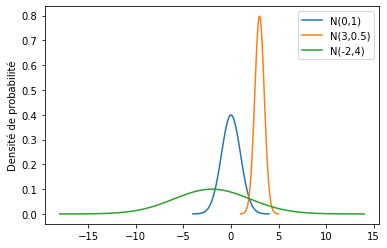

In [9]:
# On importe numpy et matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Différentes moyennes
means = [0, 3, -2]
# Différents écarts-types
sds = [1, 0.5, 4]

for mu, sigma in zip(means, sds):
    # On crée un ensemble de valeurs où l'on évalue la densité de probabilité
    # ces valeurs sont comprises dans l'intervalle centré de largeur 4*sigma
    # et on en considère 100
    xrange = np.linspace(mu-4*sigma, mu+4*sigma, 100)
    # On trace la densité de probabilité de moyenne mu et d'écart-type sigma
    plt.plot(xrange, sp_st.norm.pdf(xrange, mu, sigma),
            label=rf"N({mu},{sigma})")
# On ajoute un titre à l'axe y
plt.ylabel("Densité de probabilité")
# On demande d'afficher la légende
plt.legend()
# On affiche le graphique
plt.show()

De la même manière, on peut tracer les différentes fonctions de répartitions.

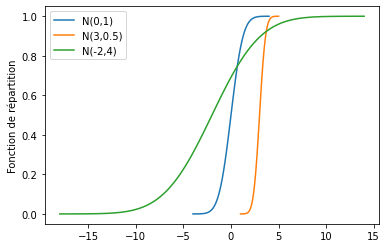

In [10]:
for mu, sigma in zip(means, sds):
    # On crée un ensemble de valeurs où l'on évalue la fonction de répartition
    # ces valeurs sont comprises dans l'intervalle centré de largeur 4*sigma
    # et on en considère 100
    xrange = np.linspace(mu-4*sigma, mu+4*sigma, 100)
    # On trace la fonction de répartition de moyenne mu et d'écart-type sigma
    plt.plot(xrange, sp_st.norm.cdf(xrange, mu, sigma),
            label=rf"N({mu},{sigma})")
# On ajoute un titre à l'axe y
plt.ylabel("Fonction de répartition")
# On demande d'afficher la légende
plt.legend()
# On affiche le graphique
plt.show()

### Résolution de l'exercice 1

On va devoir considérer deux distributions. Celle de la taille des hommes et celle de la taille des femmes.

In [11]:
# Taille moyenne et écart-type pour les hommes
mu_men = 172
sigma_men = np.sqrt(196)

# Taille moyenne et écart-type pour les femmes
mu_women = 162
sigma_women = np.sqrt(144)

1. On cherche la proportion d'hommes belges d'une taille inférieure à 160cm. Il suffit donc d'évaluer la fonction de réparition en 160.

In [12]:
ans = 100*sp_st.norm.cdf(160, mu_men, sigma_men)
print("La réponse est %.2f%%" % ans)

La réponse est 19.57%


2. On cherche la proportion d'hommes belges d'une taille supérieure à 2m. Il suffit de connaître la proportion pour une taille inférieure à 2m et de la soustraire des 100%.

In [13]:
ans2 = 100*(1 - sp_st.norm.cdf(200, mu_men, sigma_men))
print("La réponse est %.2f%%" % ans2)

La réponse est 2.28%


3. Pour connaître la proportion d'homme belge entre 165 et 185cm, on utilise
$$
P_X(a < X \leq b) = F_X(b) - F_X(a)
$$


In [14]:
ans3 = 100*(sp_st.norm.cdf(185, mu_men, sigma_men) - sp_st.norm.cdf(165, mu_men, sigma_men))
print("La réponse est %.2f%%" % ans3)

La réponse est 51.49%


4. Si on a un échantillon aléatoire de 10000 belges et qu'on les classes par taille croissante, la taille du 9000 sera proche du fractile d'ordre 0.9 de la distribution des tailles. En effet, le fractile d'odre 0.9 correspond à la valeur pour laquelle il y a 90% de chance de lui être inférieure.

In [15]:
ans4 = sp_st.norm.ppf(0.9, mu_men, sigma_men)
print("La réponse est %.2fcm" % ans4)

La réponse est 189.94cm


On peut simuler cet échantillon et voir ce qu'il se passe.

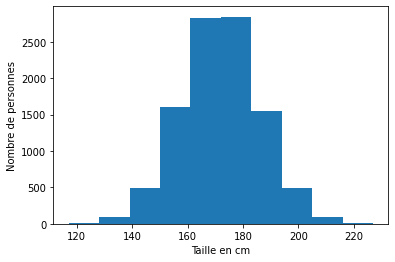

La taille du 9000ème est 189.94cm


In [16]:
np.random.seed(42)
# On crée un échantillon de taille 10000 tiré de notre distribution
sample = sp_st.norm.rvs(mu_men, sigma_men, 10000)
# On trace l'échantillon
plt.hist(sample)
plt.xlabel("Taille en cm")
plt.ylabel("Nombre de personnes")
plt.show()

# On trie par taille croissante
sample.sort()
# On regarde la taille du 9000
print("La taille du 9000ème est %.2fcm" % sample[8999])

5. On cherche finalement la probabilité qu'un homme choisi au hasard soit plus grand qu'une femme choisie au hasard. Il s'agit donc de trouver
$$
P(X > Y) = 1 - P(X \leq Y) = 1 - P(X-Y \leq 0)
$$
et on doit donc considérer la nouvelle variable aléatoire $Z = X - Y$.
Or, on sait que, lorsqu'on soustrait deux variables aléatoires, les moyennes sont soustraites mais les variances s'additionnent
$$
\Rightarrow
\begin{cases}
E(Z) &= 10,\\
\sigma^2(Z) &= 340.
\end{cases}
$$
De plus, la somme de deux v.a. gaussiennes indépendantes est également un v.a. gaussienne.

On va ainsi évaluer la fonction de répartition de $Z$ en 0 et soustraire cette valeur des 100%.

In [17]:
ans5 = 100*(1 - sp_st.norm.cdf(0, 10, np.sqrt(340)))
print("La réponse est %.2f%%" % ans5)

La réponse est 70.62%


[Retour en haut](#Table-des-matières)